In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

Useful functions

In [37]:
# Show stats for a specific column

def stats(column, df, profondeur = None):
    # Calculate statistics
    if profondeur:
        if profondeur not in [(0,5), (5, 15), (15, 30), (30, 60), (60, 100), (100, 200)]:
            raise ValueError("Profondeur doit etre un de ces tuples: (0,5), (5, 15), (15, 30), (30, 60), (60, 100), (100, 200)")
        df = df[(df['UD'] == profondeur[0]) & (df['LD'] == profondeur[1])]
    column_data = df[column]
    column_stats = {
        'col': column,
        'min': column_data.min(),
        'max': column_data.max(),
        'median': column_data.median(),
        'Q1': column_data.quantile(0.25),
        'Q3': column_data.quantile(0.75),
        'mean': column_data.mean(),
        'std_deviation': column_data.std(),
        'cv': (column_data.std() / column_data.mean()) * 100,
        'skewness': column_data.skew(),
        'kurtosis': column_data.kurtosis()
    }
    if profondeur is not None:
        column_stats['Profondeur'] = f'{profondeur[0]}-{profondeur[1]}'

    return column_stats
# Show all stats for all columns    
def all_stats(df):
    cols = [
       'pH', 'CE', 'porosite', 'CEC', 'A%', 'L%', 'LF%',
       'LG%', 'S%', 'SF%', 'SG%', 'Poussieres', 'CaCO3 actif', 'CaCO3 total',
       'OM', 'OC', 'Na+', 'P', 'N', 'K', 'Mg', 'Ca', 'C03 2-', 'CbyN',
       'Da', 'Calcaire Total', 'Calcaire actif', 'Dr', 'Gypse',
       ]
    intervals = [(0, 5), (5, 15), (15, 30), (30, 60), (60, 100), (100, 200)]

    for col in cols:
        for interval in intervals:
            print(stats(col, df, interval))

# Show the box plot for a specific column   
def box_plot(column, df, ud_ld=None):
    plt.figure(figsize=(12, 6))

    if ud_ld:
        ud_value, ld_value = ud_ld
        filtered_df = df[(df['UD'] == ud_value) & (df['LD'] == ld_value)]
        sns.boxplot(x=column, data=filtered_df)
        plt.title(f'Box plot of {column} for UD={ud_value}, LD={ld_value}')
    else:
        sns.boxplot(x=column, data=df)
        plt.title('Box plot of ' + column)

    plt.xlabel(column)
    plt.show()

# Show a histogram for all columns
def histogram(column, df, ud_ld=None):
    plt.xlabel('Valeurs')
    plt.ylabel('Fréquence')

    if ud_ld:
        ud_value, ld_value = ud_ld
        filtered_data = df[(df['UD'] == ud_value) & (df['LD'] == ld_value)][column]
        plt.title(f'Distribution des Données {column} pour UD={ud_value}, LD={ld_value}')
    else:
        filtered_data = df[column]
        plt.title('Distribution des Données ' + column)

    plt.hist(filtered_data, bins=50, edgecolor='black', alpha=1)
    plt.show()

# show scatter plot for two columns 
def scatterplot(col1, col2, df, ud_ld=None):
    plt.figure(figsize=(8, 6))

    if ud_ld:
        ud_value, ld_value = ud_ld
        filtered_df = df[(df['UD'] == ud_value) & (df['LD'] == ld_value)]
        sns.scatterplot(x=col1, y=col2, data=filtered_df)
        plt.title(f'Scatterplot of {col1} vs {col2} for UD={ud_value}, LD={ld_value}')
    else:
        sns.scatterplot(x=col1, y=col2, data=df)
        plt.title(f'Scatterplot of {col1} vs {col2}')

    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()

def all_scatterplots(df, ud_ld=None):
    plotted_pairs = set()  # Track plotted pairs to avoid redundancy
    for col1 in df.columns:
        for col2 in df.columns:
            if col1 != col2 and (col2, col1) not in plotted_pairs:
                correlation = df[col1].corr(df[col2])
                print(f'Correlation between {col1} and {col2}: {correlation}')
                scatterplot(col1, col2, df, ud_ld=ud_ld)
                plotted_pairs.add((col1, col2))

def top_sub_soil(df):
  total_values = len(df['LD'])
  values_under_30 = len(df[df['LD'] <= 30])

  top_soil = (values_under_30 / total_values) * 100
  sub_soil = 100 - top_soil
  return (top_soil, sub_soil)

def nan_percent(df, column, depth_range=None):
    # Filter DataFrame based on depth range if provided
    if depth_range:
        debut_profondeur, fin_profondeur = depth_range
        filtered_df = df[(df['UD'] == debut_profondeur) & (df['LD'] == fin_profondeur)]
    else:
        filtered_df = df

    # Count NaN values in the specified column
    nan_count = filtered_df[column].isna().sum()

    # Calculate percentage of NaN values
    total_rows = filtered_df.shape[0]

    nan_percentage = (nan_count / total_rows) * 100 if total_rows > 0 else 0

    return nan_count, nan_percentage

Load csv as well as drop unnecessary columns

In [38]:
soil_df = pd.read_csv("./datasets/splined_soil_data_(first_dataset_version).csv")
print(soil_df.columns)
columns_to_drop = ['id', 'id_memoire', 'Region', 'Longitude', 'latitude', 'altitude']
soil_df.replace(' ', np.nan, inplace=True)
soil_df.drop(columns_to_drop, axis = 1, inplace=True)

Index(['id', 'id_memoire', 'id_ech', 'Wilaya', 'Region', 'random', 'X', 'Y',
       'Longitude', 'latitude', 'altitude', 'UD', 'LD', 'average profondeur',
       'Profondeur', 'USDA Soil Taxonomy', 'pH', 'CE', 'porosite', 'CEC', 'A%',
       'L%', 'LF%', 'LG%', 'S%', 'SF%', 'SG%', 'ALR(L)', 'ALR(S)',
       'Poussieres', 'CaCO3 actif', 'CaCO3 total', 'OM', 'OC', 'Na+', 'P', 'N',
       'K', 'Mg', 'Ca', 'C03 2-', 'CbyN', 'Da', 'Calcaire Total',
       'Calcaire actif', 'Dr', 'Gypse'],
      dtype='object')


In [39]:
soil_df = soil_df.astype(str)
columns = [x for x in soil_df.columns]
columns.remove('USDA Soil Taxonomy')
columns.remove('Wilaya')
columns.remove('random')
for column in columns:
    soil_df[column] = soil_df[column].str.replace('\u202f', '').str.replace(',', '.').astype(float)

Plot our map of soil density

C:\Users\zakmins\AppData\Local\Temp\ipykernel_14256\1317163792.py:14: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  algeria_data_north = algeria_data[algeria_data.geometry.centroid.y > dividing_latitude]


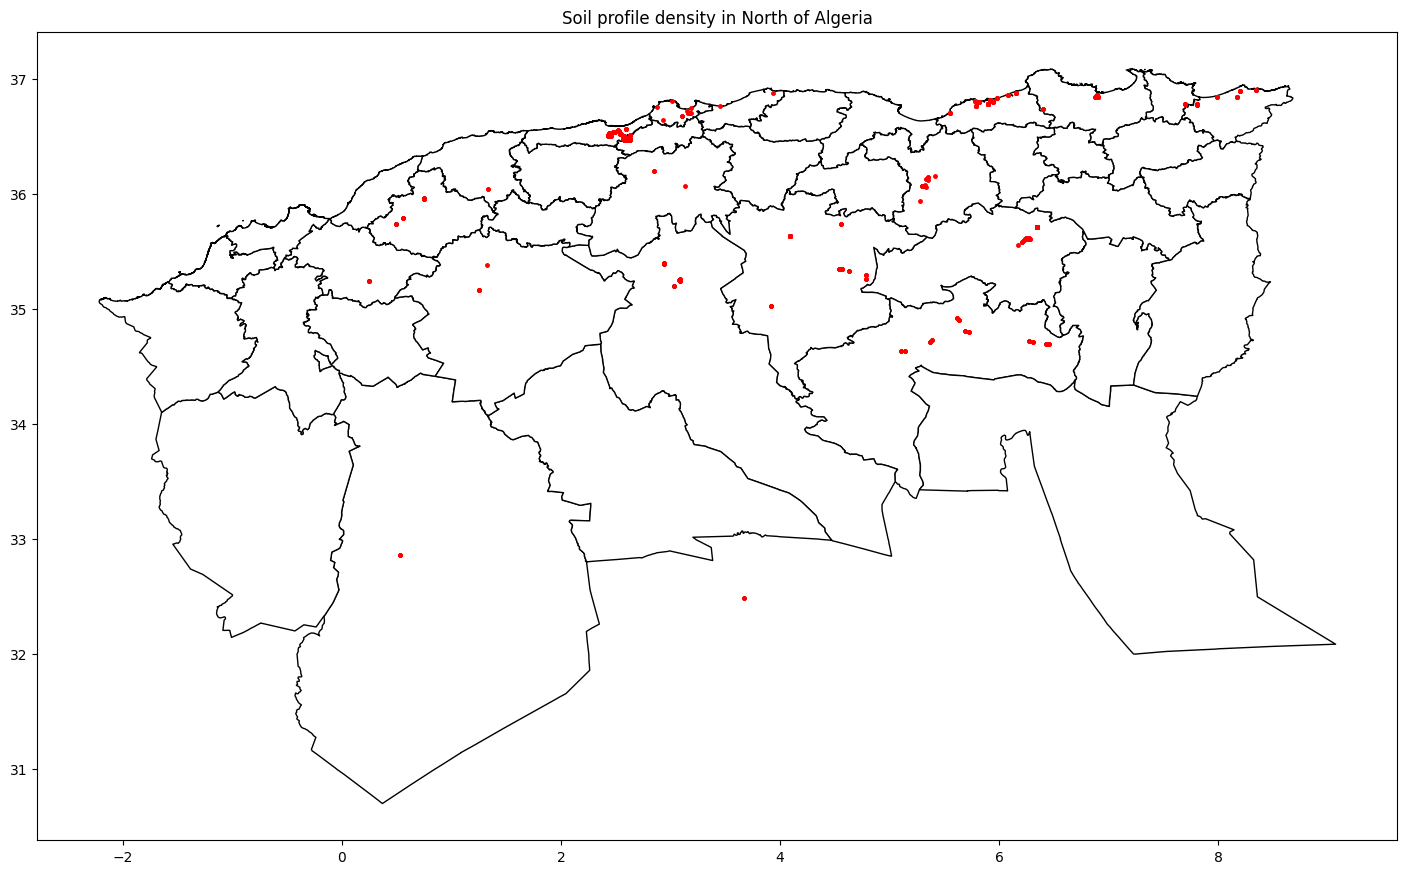

In [20]:
# Load algerian data
algeria_data = gpd.read_file('./maps/dza_admbnda_adm1_unhcr_20200120.shp')

# Create a GeoDataFrame from your DataFrame 'df'
df_geo = gpd.GeoDataFrame(soil_df, geometry=gpd.points_from_xy(soil_df.X, soil_df.Y))

# Plot
fig, ax = plt.subplots(figsize=(18.5, 10.5))

# Define the latitude that divides Algeria into northern and southern halves
dividing_latitude = 32

# Filter the GeoDataFrame to keep only the northern part
algeria_data_north = algeria_data[algeria_data.geometry.centroid.y > dividing_latitude]

# Plot Algeria map
algeria_data_north.plot(ax=ax, color='white', edgecolor='black')

# Plot soil profile density points
df_geo.plot(ax=ax, color='red', markersize=5)

plt.title("Soil profile density in North of Algeria")
ax.set_aspect(1.05)
plt.savefig('./maps/soil_profile_density.png', dpi=200)
plt.show()

Profile counts in Algeria states

In [21]:
unique_id_count = soil_df.groupby('Wilaya')['id_ech'].nunique()
print(unique_id_count)

Wilaya
Alger              11
Annaba             13
Batna             141
Biskra             11
Boumerdes           3
Chelef              3
Djelfa             20
El Bayad            1
El taref           12
Ghardaia            2
Jijel              87
Medea              20
Mitija             80
Msila              46
Ouled Djellal       2
Relizane          126
Setif              16
Sidi Bel Abbes      9
Skikda             16
Tiaret              1
Tipaza              3
Tlemcen            18
Name: id_ech, dtype: int64


Percentage tae chaque profondeur

In [22]:
occurrence_percentage = soil_df['average profondeur'].value_counts(normalize=True) * 100
occurrence_percentage_dict = occurrence_percentage.to_dict()
print(occurrence_percentage_dict)

{10.0: 28.274428274428274, 2.5: 26.03950103950104, 22.5: 22.505197505197504, 45.0: 13.409563409563411, 80.0: 7.120582120582121, 150.0: 2.6507276507276507}


In [40]:
nan_count, nan_percentage = nan_percent(soil_df, 'pH')

print(f'Number of NaN values in pH: {nan_count}, Percentage: {nan_percentage}%')

Number of NaN values in pH: 52, Percentage: 2.7027027027027026%


In [41]:
print(f"Total number of profiles: {soil_df['id_ech'].nunique()}")
print(f"Total number of horizons: {len(soil_df)}")

Total number of profiles: 641
Total number of horizons: 1924


In [26]:
print(f"The number of unique latitudes: {soil_df['X'].nunique()} ouf of 641" )
print(f"The number of unique longitudes: {soil_df['Y'].nunique()} ouf of 641")

The number of unique latitudes: 175 ouf of 641
The number of unique longitudes: 170 ouf of 641


In [27]:
soil = top_sub_soil(soil_df)
print(f'Topsoil percentage: {soil[0]} \nSubsoil Percentage: {soil[1]}')

Topsoil percentage: 76.81912681912681 
Subsoil Percentage: 23.180873180873192


In [42]:
properties = ['pH', 'CE', 'CEC', 'OM', 'A%', 'S%', 'L%']

for prop in properties:
    print(stats(prop, soil_df))

{'col': 'pH', 'min': 0.817, 'max': 9.15, 'median': 8.02, 'Q1': 7.5595, 'Q3': 8.24, 'mean': 7.736796474358974, 'std_deviation': 0.8739447870951709, 'cv': 11.295951625347374, 'skewness': -2.255701826353859, 'kurtosis': 8.105612954453408}
{'col': 'CE', 'min': 0.0, 'max': 151.285, 'median': 0.839, 'Q1': 0.18, 'Q3': 2.84, 'mean': 4.150233379501385, 'std_deviation': 10.667903589589585, 'cv': 257.04346271898675, 'skewness': 5.512569914830291, 'kurtosis': 43.91533697710355}
{'col': 'CEC', 'min': 0.25, 'max': 569.0, 'median': 18.524, 'Q1': 9.5, 'Q3': 26.62, 'mean': 38.850202496532596, 'std_deviation': 77.28802989981727, 'cv': 198.9385509810799, 'skewness': 4.150238499836261, 'kurtosis': 19.492013791209313}
{'col': 'OM', 'min': 0.0, 'max': 294.671, 'median': 2.22, 'Q1': 1.403, 'Q3': 3.33675, 'mean': 3.790392572944297, 'std_deviation': 12.47869442167489, 'cv': 329.21905004635715, 'skewness': 18.68537793096514, 'kurtosis': 399.75777189490964}
{'col': 'A%', 'min': 0.0, 'max': 75.197, 'median': 29.4

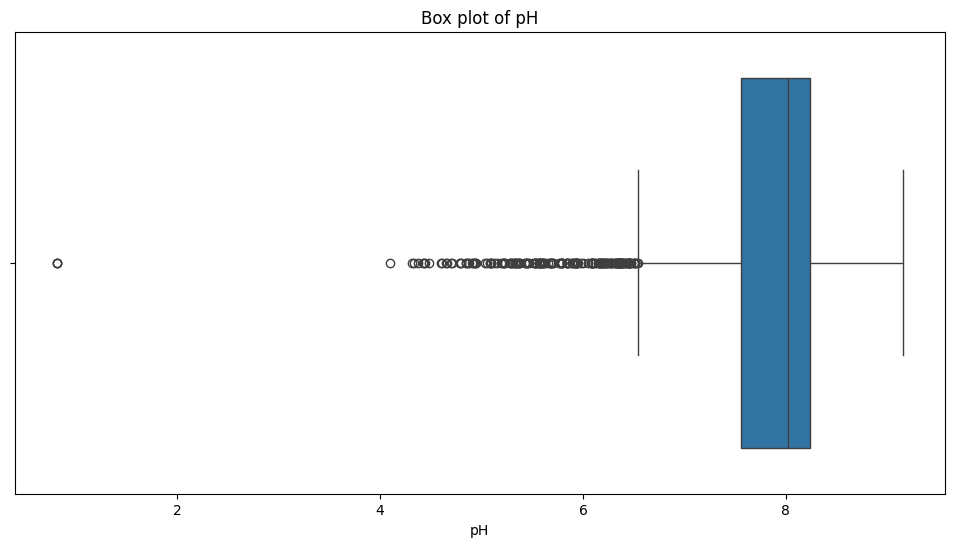

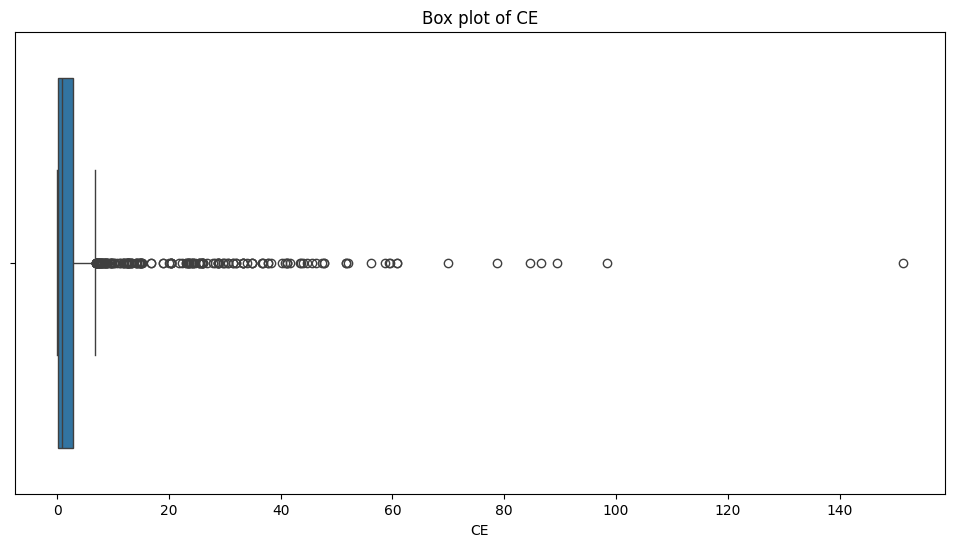

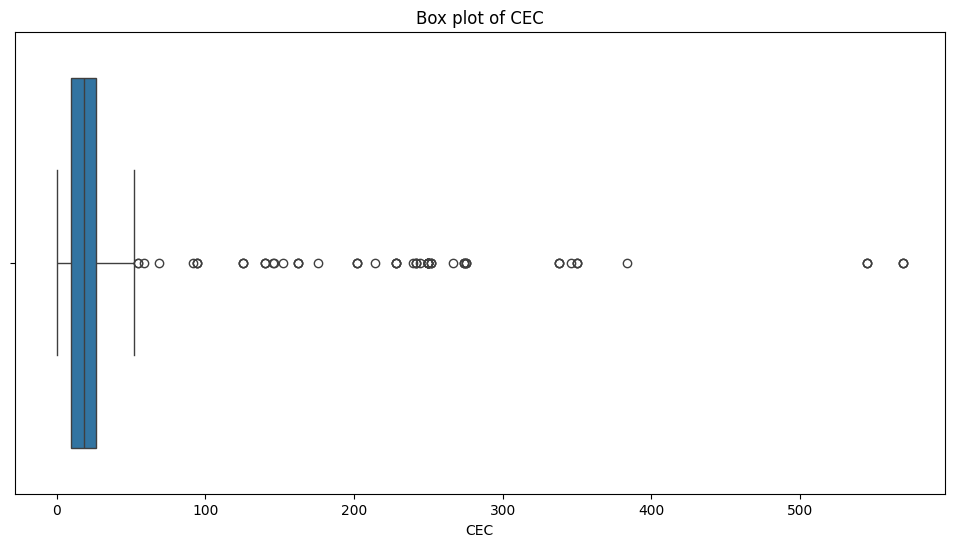

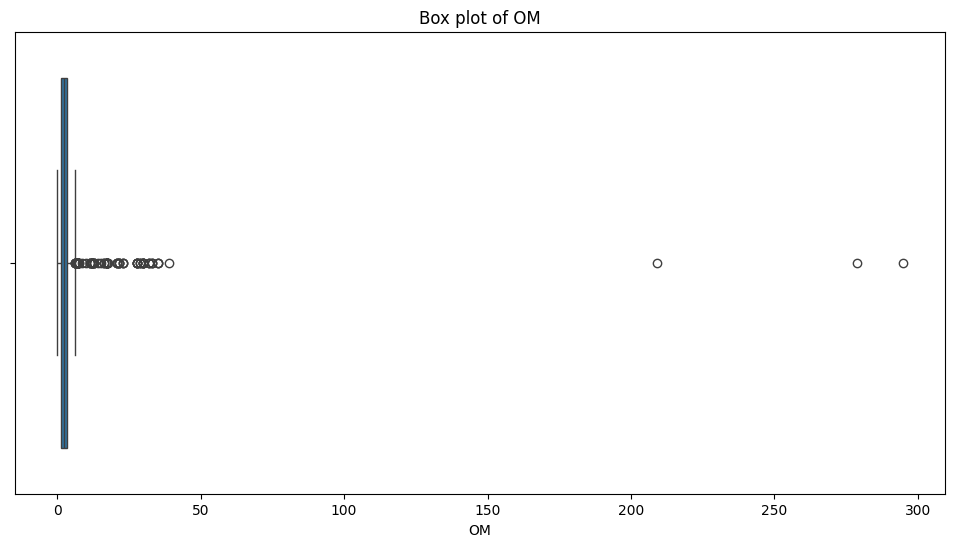

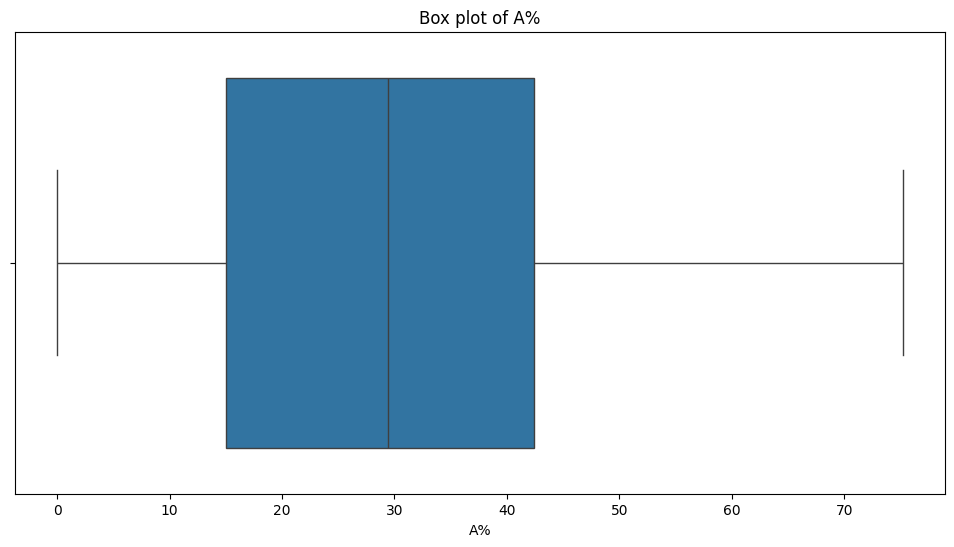

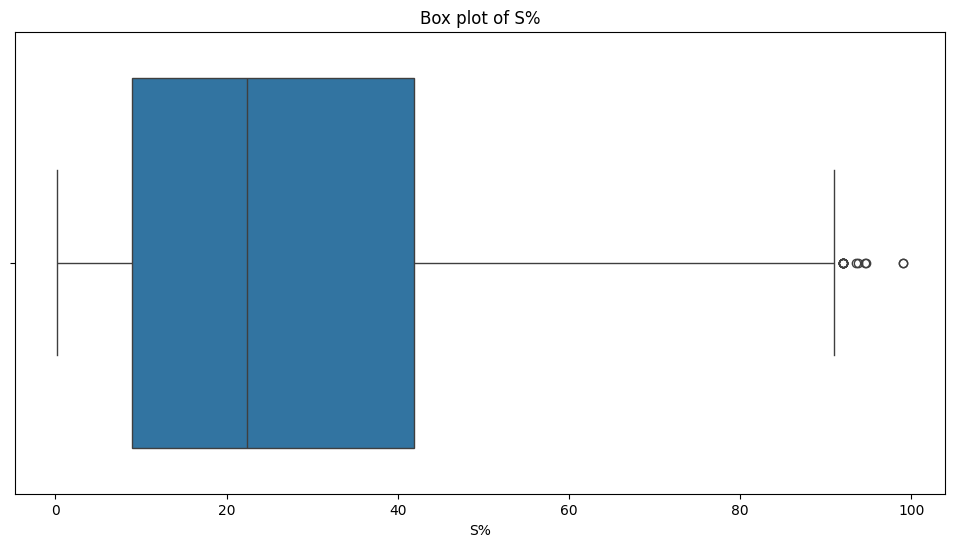

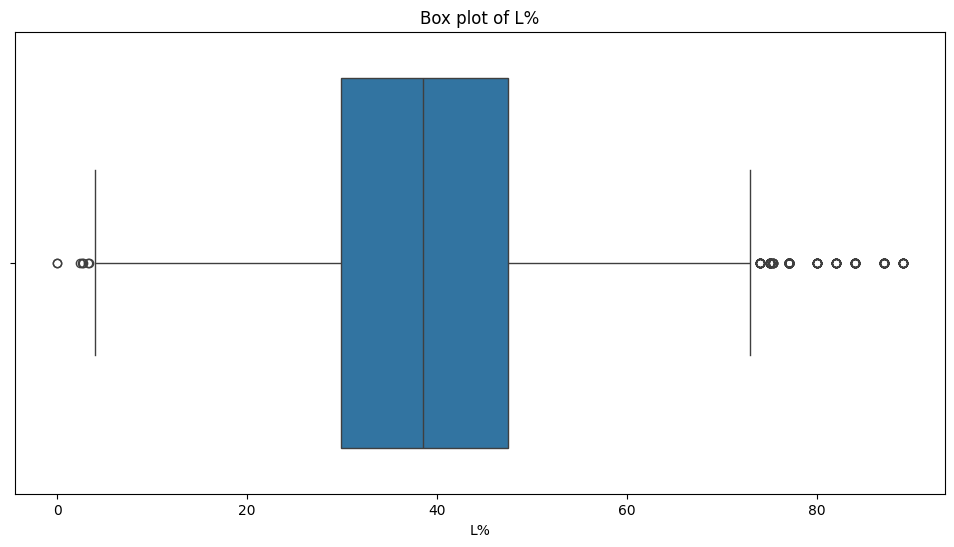

In [51]:
properties = ['pH', 'CE', 'CEC', 'OM', 'A%', 'S%', 'L%']

for prop in properties:
    box_plot(prop, soil_df)

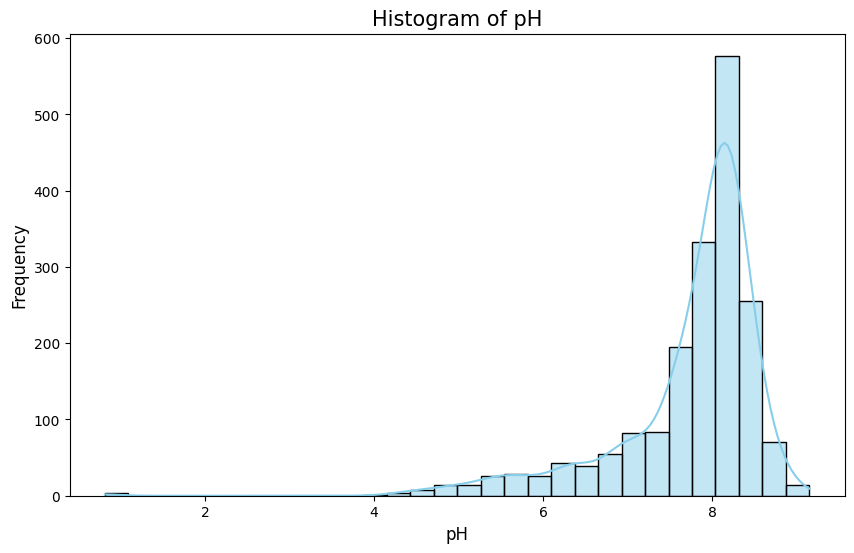

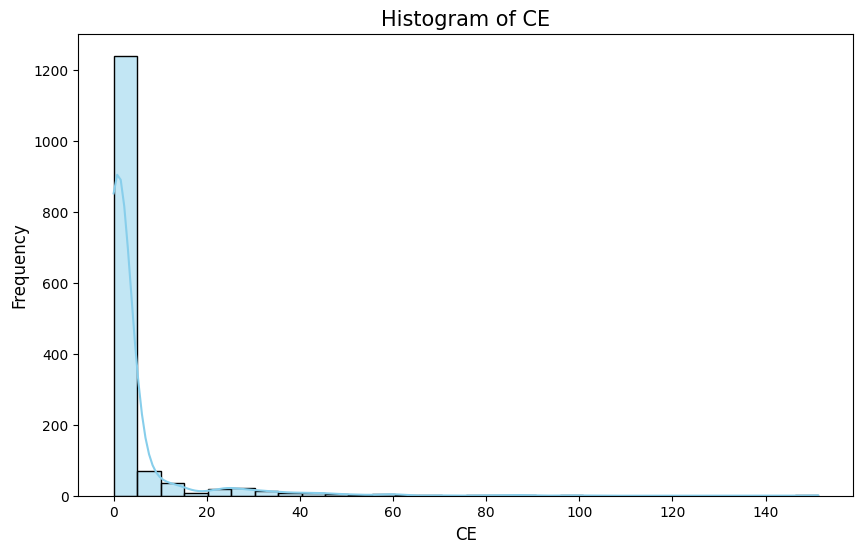

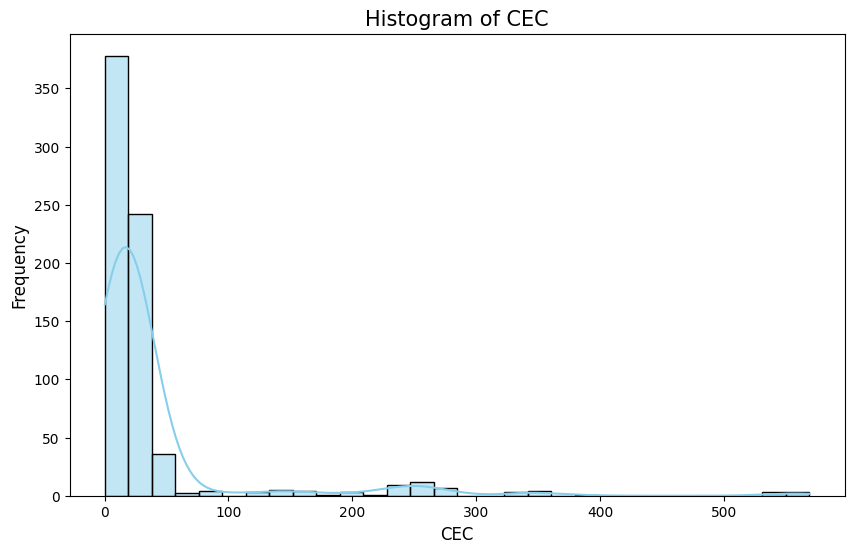

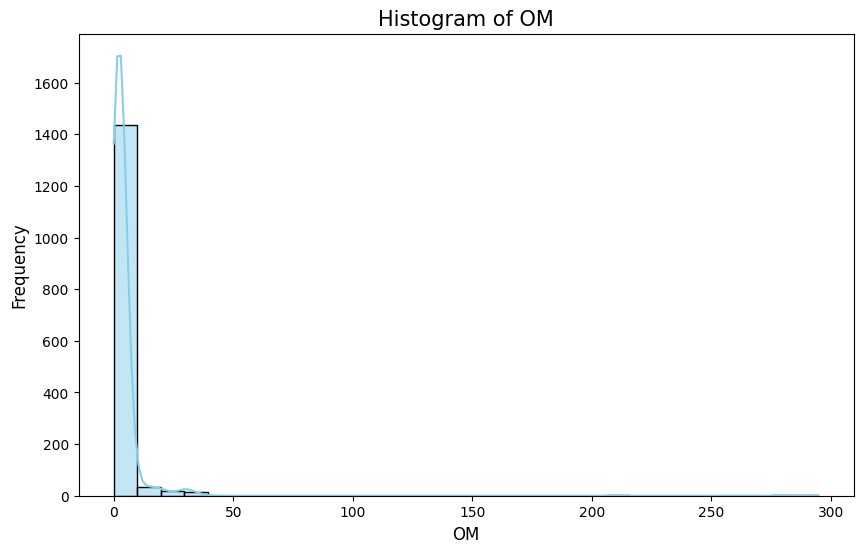

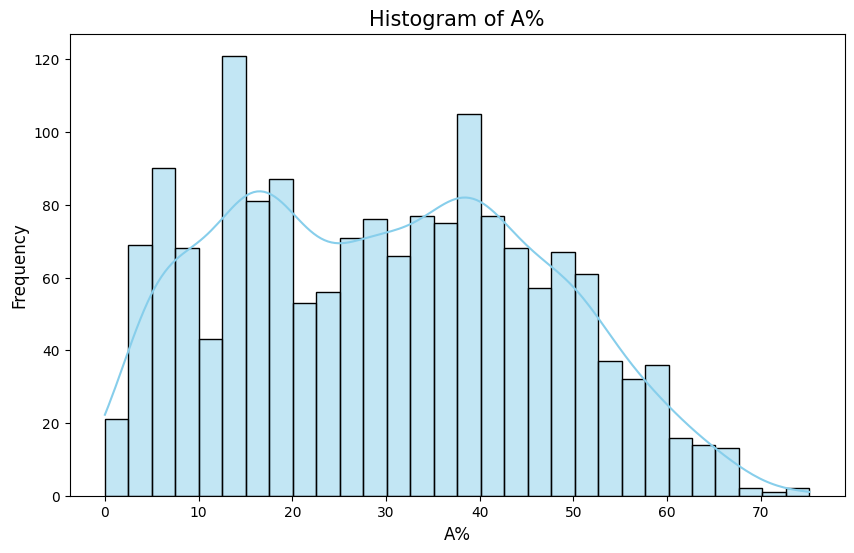

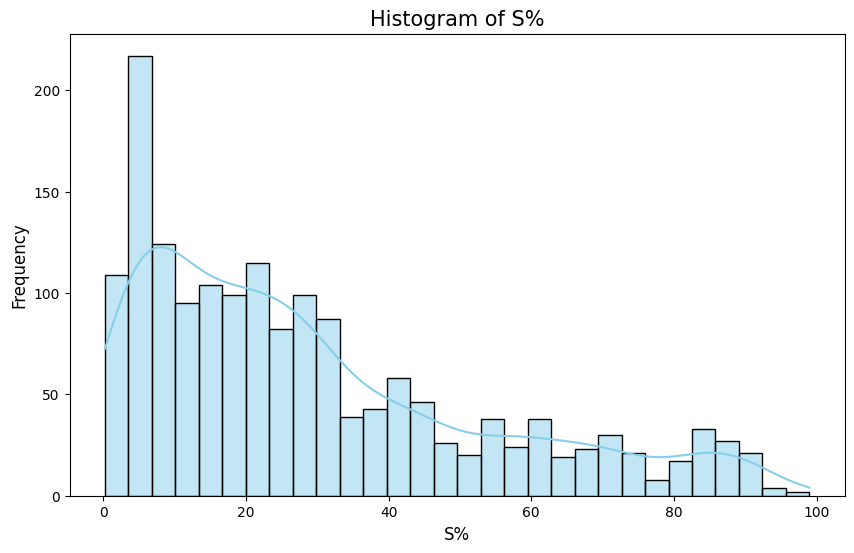

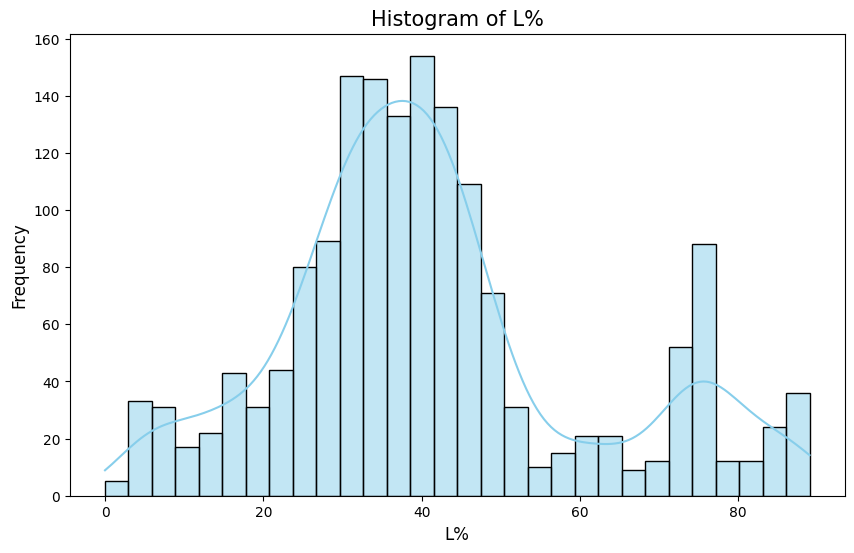

In [47]:
properties = ['pH', 'CE', 'CEC', 'OM', 'A%', 'S%', 'L%']

for prop in properties:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=soil_df, x=prop, bins=30, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {prop}', fontsize=15)
    plt.xlabel(prop, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.show()

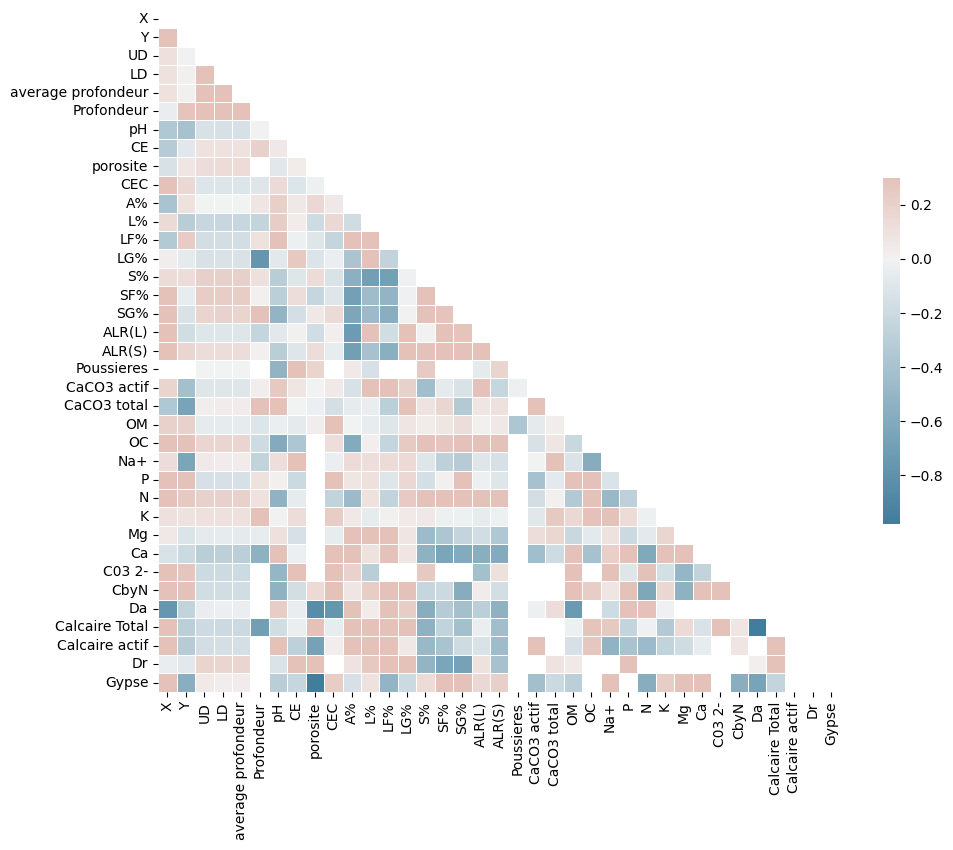

In [45]:
soil_df_float = soil_df.drop(['Wilaya', 'USDA Soil Taxonomy', 'id_ech', "random"], axis = 1)
# Calculate correlation matrix
corr = soil_df_float.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()